# Estructuras de datos en ![](https://www.r-project.org/Rlogo.png)



## Data Frame (data.frame)

Como vimos antes, una matriz sólo puede contener elementos del mismo tipo. Debido a esta
limitación surgen los data frames.

Normalmente un data frame contendrá un dataset, con las variables como columnas y las  observaciones como filas.
+ Columnas: atributos, variables
+ Filas: observaciones, casos, instancias

Internamente, R maneja los **data frames** como listas de vectores o factores, todas de la  misma longitud.

Podemos asimilarlos a una hoja de cálculo tradicional.

Para crear data frames usaremos la función `data.frame(x, y, …)`, la cual recibe como parámetros las columnas del dataset.

## Creación de data frames

Es posible crear data frames “a mano”, pero no es la práctica habitual.

In [ ]:
###################################
# Data frames: Creación           #
###################################
# Creación de data frame vacío
empty <- data.frame()

# A partir de dos vectores
c1 <- 1:10 # vector de enteros
c2 <- letters[1:10] # vector de strings
df <- data.frame(col1 = c1, col2 = c2)
df

Normalmente leeremos los datasets desde ficheros con las funciones `read.csv(filename)` o `read.table(filename)`.

In [ ]:
# Lectura desde fichero
df <- read.csv("filename.csv", header = T)

## Operaciones sobre data frames

Análisis exploratorio de los datos de un data frame:
+ `head(df)`: devuelve las primeras observaciones.
+ `tail(df)`: devuelve las últimas observaciones.
+ `str(df)`: muestra de forma rápida la estructura de la información almacenada.
    + Número total de observaciones.
    + Número total de variables.
    + Lista con todos los nombres de las variables.
    + El tipo de cada variable.
    + Las primeras observaciones de cada variable.
+ `summary(df)`: muestra los estadísticos básicos de cada variable.

In [ ]:
###################################
# Data frames: Operaciones        #
###################################

# Análisis exploratorio
head(mtcars)
head(mtcars, 10)
head(mtcars, -10)

In [ ]:
tail(mtcars)
tail(mtcars, 10)
tail(mtcars, -10)

In [ ]:
str(mtcars)

In [ ]:
summary(mtcars)

## Manipulación de data frames

Para unir data frames la mejor manera es usar la función `rbind(df1, df2, …)`, obteniendo un
data frame resultante con más filas.

In [ ]:
###################################
# Data frames: Manipulacion       #
###################################
# Añadir filas
df <- rbind(mtcars, data.frame(mpg = 22, cyl = 5, disp = 202, hp = 100, drat = 2.56, wt = 3.1, 
                               qsec = 15, vs = 1, am = 0, gear =5, carb = 4, row.names=c("seat")))

Para añadir columnas podemos emplear la función `cbind(df1, df2, …)`, pasando como  parámetros otro data frame o un vector. También existen otras maneras de añadir columnas.

In [ ]:
# Añadir columnas
df$newcolumn <- rep(1, nrow(df))
df[, 'copyofhp'] <- df$hp
df$hp.gear <- df$hp / df$gear
v <- 1:nrow(df)
df <- cbind(df, v)

## Indexación de data frames

Al igual que sucedía con las matrices, utilizaremos los corchetes `[ ]` para indexar data  frames. Emplearemos dos números enteros: uno para la fila y otro para la columna `[row,  column]`.

Podemos aplicar lo aprendido al indexar matrices para indexar data frames.

Existe una manera rápida de seleccionar una columna, utilizando la expresión `df$column` ó  `df["column"]` ó `df[1]`.

Al indexar podemos obtener vectores o data frames dependiendo como lo hagamos.
+ Al seleccionar filas obtenemos siempre data frames.
+ Al seleccionar múltiples columnas obtenemos siempre data frames.
+ Al seleccionar columnas individuales podemos obtener data frames o vectores.

### Indexación de celdas

In [ ]:
###################################
# Data frames: Indexación         #
###################################

# Indexando celdas
df <- data.frame(mtcars)
str(df)
df[5, 2] # Obtiene una única celda
df[1:5, 1:2] # Obtiene varias celdas
df[1:2, c("gear", "am")]
df[1:2, c("gear", "am")] <- 0 # Asignación de celdas
df[1:2, c("gear", "am")]

### Indexación de filas

In [ ]:
# Indexando filas (siempre devuelve data frames)
df[1, ]
df[-nrow(df), ]
df[1:5, ]
df[(df$hp > 150 & df$hp < 200), ]
subset(df, hp > 150 & hp < 200)

vrow <- as.numeric(as.vector(df[1, ])) # Convertimos el resultados de la indexación en vector

### Indexación de columnas

In [ ]:
# Indexando columnas
df$hp # Devuelve un vector
df[, "hp"] # Devuelve un vector
df[, 4] # Devuelve un vector
df["hp"] # Devuelve un data frame con una columna
df[4] # Devuelve un data frame con una columna
df[["hp"]] # Devuelve un vector
df[ , c(4, 6)] # Devuelve un data frame
df[ , c("hp", "wt")] # Devuelve un data frame

## Unión de data frames

Existe una función muy útil en R que nos permitirá unir dos data frames. La función merge
recibe los siguientes parámetros:
+ `x, y`: data frames a combinar.
+ `by, by.x, by.y`: permiten especificar las columnas por las que se combinarán ambos data  frames.
+ `all, all.x, all.y`: permite seleccionar si queremos obtener todas las filas de ambos data  frames (FULL JOIN), todas las del data frame x (LEFT JOIN) o todas las del data frame  y (RIGHT JOIN).

Su funcionamiento es similar a los JOIN de SQL.

In [ ]:
###################################
# Data frames: merge              #
###################################

c1 <- 1:10
c2 <- letters[1:10]
c3 <- 5:20
c4 <- letters[5:20]
df.x <- data.frame(col1 = c1, col2 = c2)
df.y <- data.frame(col1 = c3, col2 = c4)
df.x
df.y

In [ ]:
join <- merge(df.x, df.y, by = c("col1")) #join

In [ ]:
join

In [ ]:
left.join <- merge(df.x, df.y, by = c("col1"), all.x = T) #left join

In [ ]:
right.join <- merge(df.x, df.y, by = c("col1"), all.y = T) #right join

In [ ]:
full.join <- merge(df.x, df.y, by = c("col1"), all = T) #full join

## Información sobre data frames

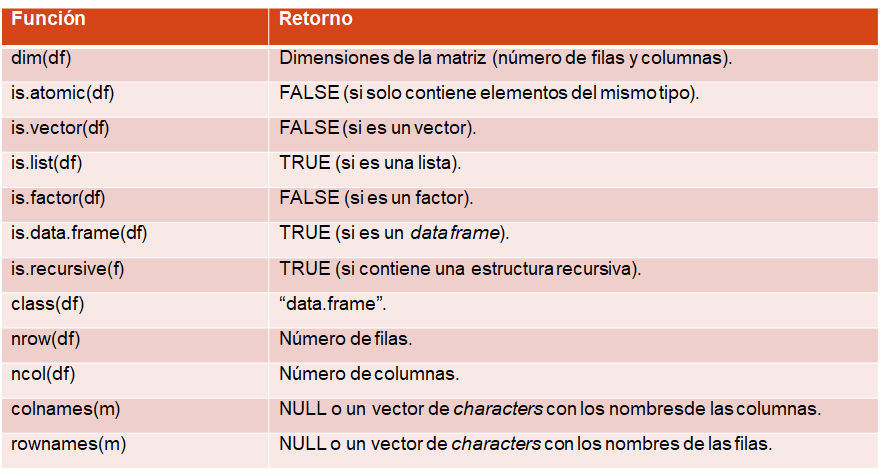

## Traps sobre data frames

Al leer data frames desde ficheros normalmente se emplea el argumento `stringsAsFactors = FALSE` para evitar la coerción a factores.

Se suele evitar emplear nombres en filas y utilizarlos sólo en columnas.

No utilizar `rbind(df1, df2, …)` con factores, ya que algunas veces puede dar problemas
(coerción).

# Ejercicio 5

In [ ]:
###################################
# Data frames                     #
###################################

# Crea a partir de los vectores siguientes un data frame
planets <- c("Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune");
type <- c("Terrestrial planet", "Terrestrial planet", "Terrestrial planet", "Terrestrial planet", "Gas giant", "Gas giant", "Gas giant", "Gas giant")
diameter <- c(0.382, 0.949, 1, 0.532, 11.209, 9.449, 4.007, 3.883); 
rotation <- c(58.64, -243.02, 1, 1.03, 0.41, 0.43, -0.72, 0.67);
rings <- c(FALSE, FALSE, FALSE, FALSE, TRUE, TRUE, TRUE, TRUE);

planets_df  <- 

# Comprueba el contenido del data frame


# Selecciona la información de los primeros tres planetas (los más cercanos al sol)
closest_planets_df <- 

# Selecciona la información de los últimos tres planetas (los más lejanos al sol)
furthest_planets_df <- 

# Comprueba la selección
    


# Selecciona la columna diameter de los últimos seis planetas (los más lejanos al sol)
furthest_planets_diameter <- 

# Selecciona sólo los planetas que tienen anillos
planets_with_rings_df <- 

# Selecciona los planetas que tienen un diametro inferior al de la tierra (aquellos que tienen diametro < 1, 
# puesto que la variable es relativa al diametro de la tierra)
small_planets_df  <- 

# La función order devuelve las posiciones de un vector ordenado ascendentemente
a <- c(4, 10, 3)
order(a)
a[order(a)]

# Ordena el data frame según el diametro de los planetas ascendentemente
positions <- 
largest_first_df <- 
largest_first_df